# Case Study - Used Cars Selling Price Prediction

In [50]:
# import pandas for the data frame manipulation.
import pandas as pd
# import numpy for numerical computations
import numpy as np
#import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the dataset
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Explanatory Data Analysis

In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# There are about 301 records of used cars with 9 related features about them.

In [11]:
# Five point statistical summary for numerical variables

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
# describe function for the categorical variables.

df.describe(include=object)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
# Check missing or null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Here no null values are there in the dataset.

In [32]:
df_cat=df.select_dtypes(include="object")
df_cat=df_cat.iloc[:,1:]
df_cat.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [39]:
for i in df_cat.columns:
    print("Feature Name: ",i)
    print("Percentage of records in each group of the feature: \n",df_cat[i].value_counts()/df.shape[0]*100)
    print("---------------------------------------------")

Feature Name:  Fuel_Type
Percentage of records in each group of the feature: 
 Petrol    79.401993
Diesel    19.933555
CNG        0.664452
Name: Fuel_Type, dtype: float64
---------------------------------------------
Feature Name:  Seller_Type
Percentage of records in each group of the feature: 
 Dealer        64.784053
Individual    35.215947
Name: Seller_Type, dtype: float64
---------------------------------------------
Feature Name:  Transmission
Percentage of records in each group of the feature: 
 Manual       86.710963
Automatic    13.289037
Name: Transmission, dtype: float64
---------------------------------------------


In [19]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
df.Car_Name.nunique()

98

In [ ]:
# Lets us drop the name of the car as it has 98 unique values and we have very less representation in our dataset from each name.

In [41]:
df=df.drop("Car_Name",axis=1)

In [43]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
# Adding a new feature "Current Year" to calculate the age of the car.

df["Current_Year"]=2020

In [45]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [46]:
# Calculating the age of the car

df["Age"]=df["Current_Year"]-df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [47]:
# Let us drop the Current_Year and Year features as the newly calculated feature Age captures them.

df=df.drop(columns=["Current_Year","Year"])

In [48]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [49]:
# Checking for correlation with the numerical columns
df.corr().T

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


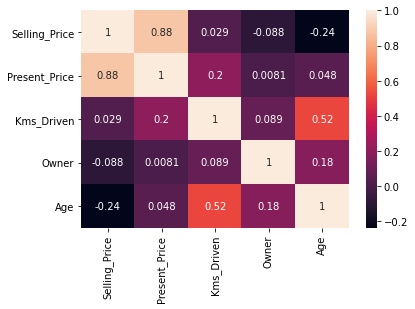

In [51]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Target(Selling Price) has a strong positive relationship of 0.88 with present selling price of the car.
# Kms driven is also strong positively correlated with Age(0.52).

Skewness of the features:
 Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
Age              1.246189
dtype: float64


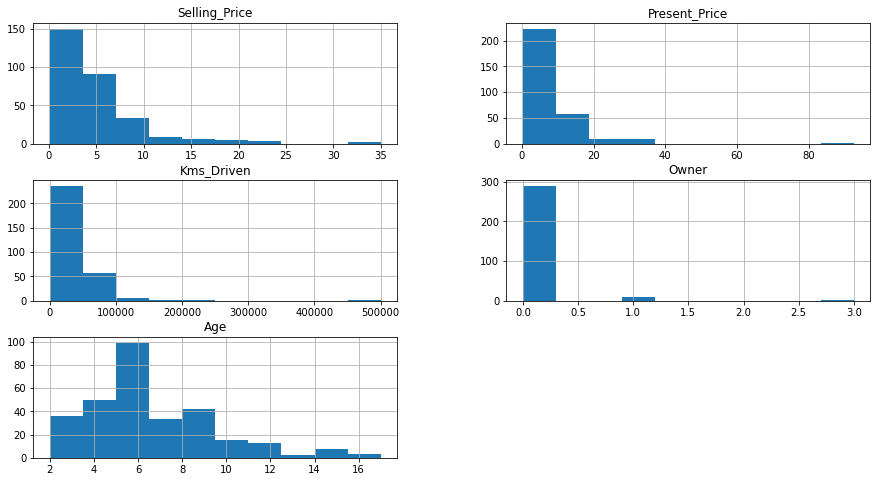

In [58]:
# Distribution check

plt.rcParams["figure.figsize"]=[15,8]
print("Skewness of the features:\n",df.skew())
df.hist();plt.show()

In [ ]:
# All of the numerical features are right skewed which there are outliers on the higher value end of the specturm. 

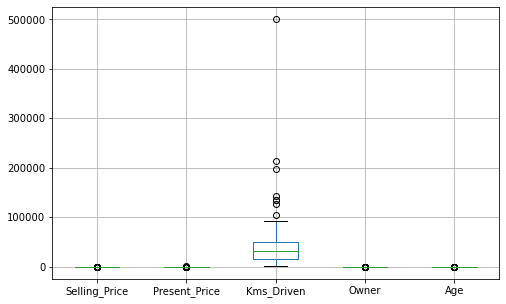

In [61]:
# Outlier Check
plt.rcParams["figure.figsize"]=[8,5]
df.boxplot();plt.show()

In [ ]:
# All of the features contain some amount of outliers with most significant in kms_driven feature.
# We will not go ahead with the outlier removal as it leads to data loss.
# This situation needs to be disccussed with the business required in mind.

In [ ]:
# Check for MultiCollinearity using Variance Inflation Factor(VIF)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric_features_vif = df.drop(columns="Selling_Price").select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.003626,Age
1,2.678801,Kms_Driven
2,1.666807,Present_Price
3,1.057155,Owner


In [ ]:
# VIF of all the features are well under < 10% which means there is least amount of multicollinearity which is good.

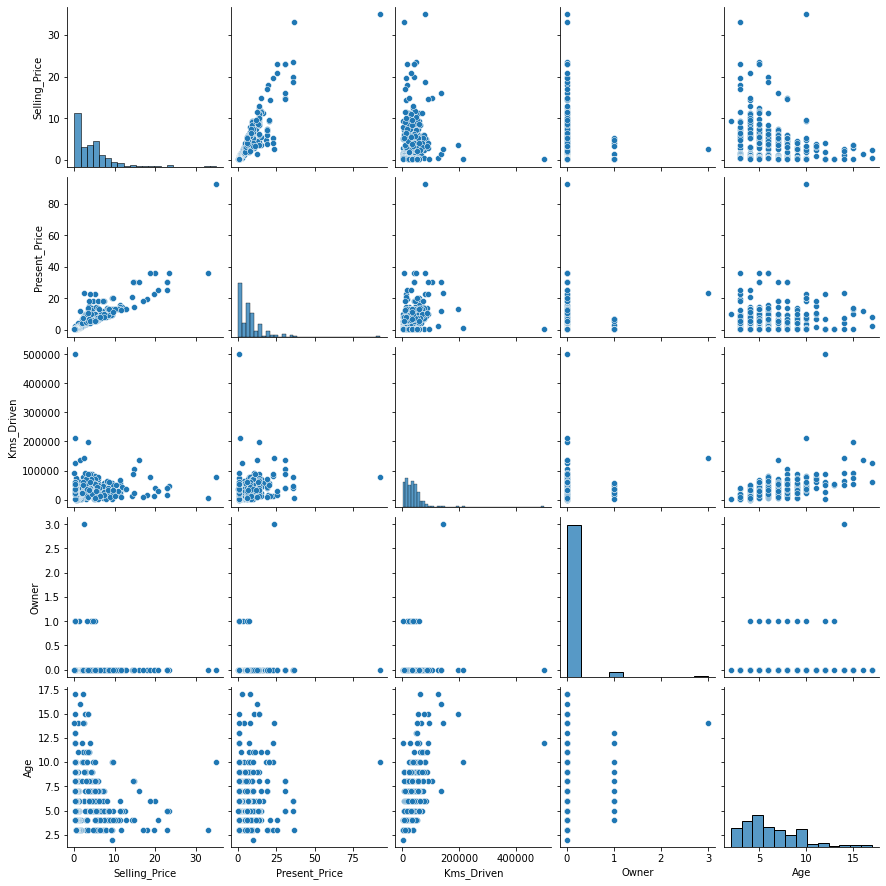

In [71]:
# Pairplot viz of all the numerical variables.

sns.pairplot(df)
plt.show()

In [ ]:
# Target(Selling Price) has a strong positive relationship with present selling price of the car.
# Kms driven is also strong positively related with Age.

In [ ]:
# N-1 dummy Encoding to numeriacalize the categorical data

In [72]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [75]:
# SPlit the data into Independent and Dependent Variables. 
# Here Selling price is dependent feature and rest all are independent

X=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]


In [76]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [77]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [78]:
# Splitting the data into train and test to buid the model.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [79]:
X_train.shape

(240, 8)

In [80]:
X_test.shape

(61, 8)

In [81]:
y_train.shape

(240,)

In [82]:
y_test.shape

(61,)

In [ ]:
# Let us use randomforestregressor as the X and Y relationship are non-linear.

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
# Use the random grid to search for best hyperparameters
# Instantiate RandomForestRegressor
rf = RandomForestRegressor()

In [89]:
#build the model for the above parameters and scoring="neg_mean_squared_error" and cv=5

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = 1)

In [90]:
# fitting on train
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [91]:
# best parameters after running RandomizedSearchCV
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [106]:
rf_random=RandomForestRegressor(**rf_random.best_params_)
rf_random.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [107]:
# predict on the test data and train_data
predictions_test=rf_random.predict(X_test)
predictions_train=rf_random.predict(X_train)

In [108]:
from statsmodels.tools.eval_measures import rmse

In [109]:
print("RMSE on Train:",rmse(y_train,predictions_train))
print("RMSE on Test:",rmse(y_test,predictions_test))

RMSE on Train: 0.40662713318581994
RMSE on Test: 3.502184861792549


In [111]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def get_train_mape(model):
    train_pred = model.predict(X_train)
    mape_train = mape(y_train, train_pred)
    return(mape_train)

In [112]:
print("MAPE on Train:",get_train_mape(rf_random))
print("MAPE on Test:",get_test_mape(rf_random))

MAPE on Train: 8.789278018945591
MAPE on Test: 27.26966255398513


In [110]:
# There is Overfitting on the train data.(Generalization Error) 
# We need to finetine the parameters to reduce it.
# Need to manually tune it.

In [132]:
rf_random1=RandomForestRegressor(n_estimators=650,min_samples_split=15,min_samples_leaf=4,max_features="auto",
                               max_depth=15)
rf_random1.fit(X_train,y_train)

# predict on the test data and train_data
predictions_test1=rf_random1.predict(X_test)
predictions_train1=rf_random1.predict(X_train)

print("RMSE on Train:",rmse(y_train,predictions_train1))
print("RMSE on Test:",rmse(y_test,predictions_test1))
print()
print("MAPE on Train:",get_train_mape(rf_random1))
print("MAPE on Test:",get_test_mape(rf_random1))

RMSE on Train: 1.1033804623231422
RMSE on Test: 3.0375732270159754

MAPE on Train: 15.600719871457816
MAPE on Test: 18.909703243164923


In [133]:
# We have reduced the overfitting by tuning it manually and the difference berween the metrics are lesser now.